<a href="https://colab.research.google.com/github/JOAOPESSANHA/FIAP_POS_IA_/blob/main/Tech_Challenge_Fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas para carregamento dos dados (arquivo insurance.csv), gráficos e dados numéricos
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
np.random.seed(42)
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#   Carregamento dos dados
dados = pd.read_csv('/content/sample_data/insurance.csv')
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Explorando os dados: Descobrindo as dimensões do conjunto, tipo e se há dados nulos


In [2]:
#   Descobrindo a quantidade de linhas e colunas
dados.shape


(1338, 7)

In [ ]:
#   Mostrando os tipos dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Não há valores faltantes nas colunas porém, temos 3 colunas de texto: Sexo, fumante e região que devem ser tratadas antes de aplicarmos o modelo preditivo. Vamos descobrir quais e quantos valores distintos essas colunas contêm.


In [3]:
dados['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [4]:
dados['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [5]:
dados['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
# Transformar texto em números, alterar o tipo das variáveis texto para numérico e ajustar os dados
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
dados['sex'] = label_encoder.fit_transform(dados['sex'])
dados['smoker'] = label_encoder.fit_transform(dados['smoker'])
dados['region'] = label_encoder.fit_transform(dados['region'])

dados.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Transformando as colunas de texto para numérico

In [7]:
# Mostrando resultado da transformação das colunas dos tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [8]:
# Verificando características de espalhamento dos valores dos dados
dados.describe()

# plt.hist(dados['age'])
# plt.show()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Analisando as correlações entre as variáveis independentes e a coluna "target" ("charges")

<Axes: >

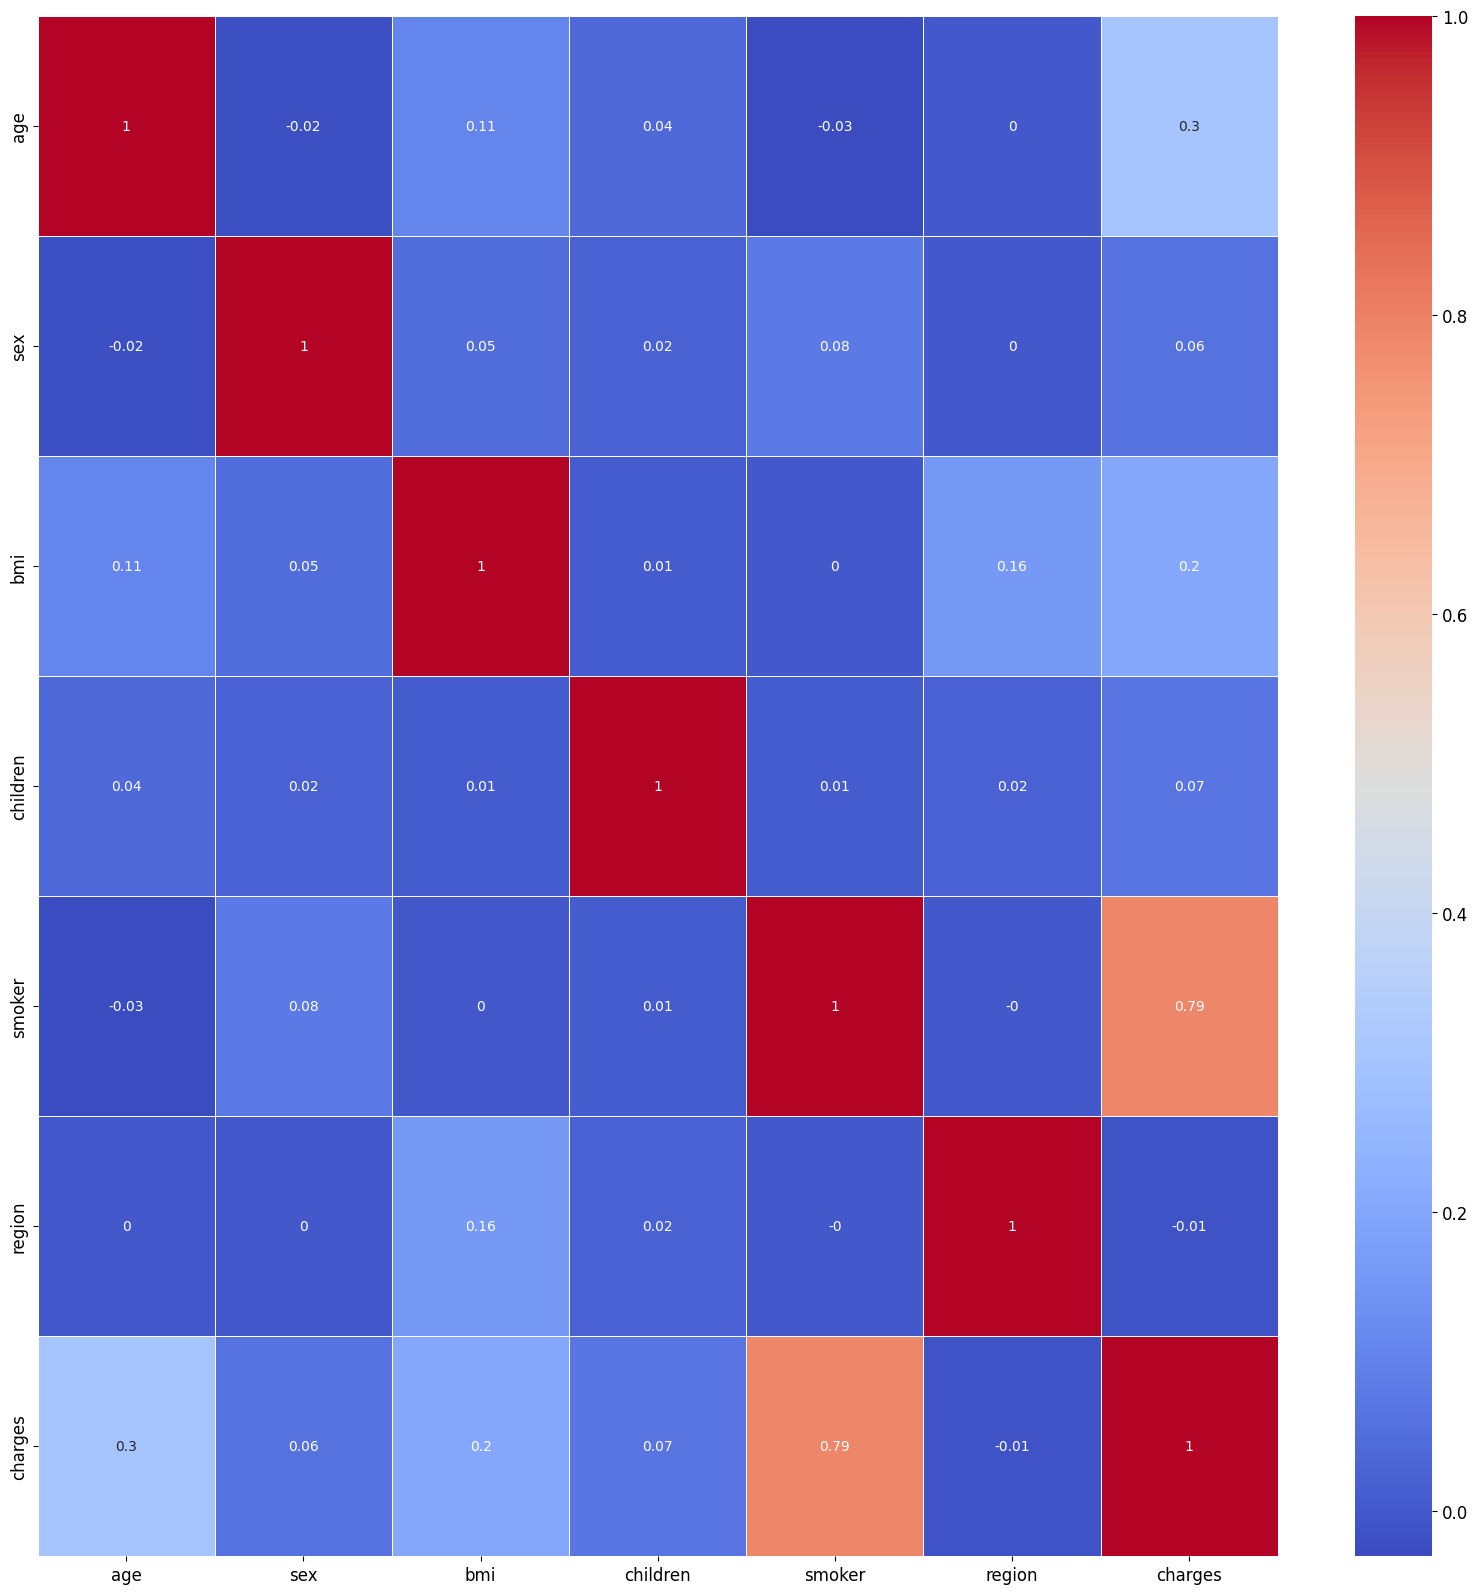

In [9]:
import seaborn as sns
numeric_columns = dados.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr().round(2)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

Vemos que a coluna "Fumante/Não fumante" tem grande influência na coluna "target"(79%), o que pode esconder a influência das demais. Na amostra, a coluna "Região" mostra tendência inversa às demais (correlação negativa).


Vamos começar com a regressão linear.

Equação do 1° grau.

A Regressão Linear busca entender o padrão de um valor dependendo de outro ou outros, e assim encontrar uma função que expressa esse padrão.

Foco: buscar o melhor valor que os coeficientes possam atingir, de maneira que a diferença entre o valor predito pela função e o real, sejam os menores.

Separando em dois conjuntos: Treino e Teste

In [10]:
from sklearn.model_selection import train_test_split
x = dados.drop(columns=['charges']) # Retirando a variável target
y = dados['charges'] # O que eu quero prever. (Target)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Mostrando a quantidade de amostras dos conjuntos de treino e de teste

In [ ]:
print(len(x_train), "treinamento +", len(x_test), "teste")

1070 treinamento + 268 teste


Treinando o modelo

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

Testando o modelo com o conjunto de teste

In [12]:
lin_reg.fit(x_test, y_test)

LinearRegression()

O MSE mede a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais observados no conjunto de dados.

Quanto menor o valor do MSE, melhor o ajuste do modelo aos dados.

Erro médio quadrático eleva ao quadrado a média do erro médio absoluto.

In [13]:
from sklearn.metrics import mean_squared_error
valores_preditos_teste = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, valores_preditos_teste)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada do erro médio quadrático
lin_rmse

5744.745350324934

Calculando o erro médio absoluto

In [14]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, valores_preditos_teste)
lin_mae

3988.4482471831057

Como a média de valores de despesas médicas é de  13.270, um erro médio absoluto de 3.988 não é aceitável

Tentaremos um modelo mais robusto para efetuar a previsão de gastos médicos. A Árvore de Decisão regressiva

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de DecisionTreeRegressor com 10 níveis
modelo_arvore = DecisionTreeRegressor(max_depth=10)
# Treinando o modelo
modelo_arvore.fit(x_train, y_train)

# Teste do modelo
modelo_arvore.fit(x_test, y_test)

DecisionTreeRegressor(max_depth=10)

Medindo o erro médio ao quadrado. O MSE é a média dos quadrados das diferenças entre os valores reais e os valores previstos.




In [17]:
# mean_squared_error
valores_preditos_teste_arvore = modelo_arvore.predict(x_test)
lin_mse = mean_squared_error(y_test, valores_preditos_teste_arvore)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada do erro médio quadrático
lin_rmse

98.45962140784889

Medindo o erro médio absoluto.
O MAE (Erro Médio Absoluto - Mean Absolute Error), onde um valor pequeno para MAE significa que suas previsões estão próximas das reais.

In [18]:
# mean_absolute_error
lin_mae = mean_absolute_error(y_test, valores_preditos_teste_arvore)
lin_mae

40.96061846481877

O "R-squared (R2)" fornece informações sobre o ajuste geral do modelo. O valor do R2 pode variar entre 0 e 1, quanto mais próximo de 1, melhor, pois indica que o modelo explica uma maior proporção da variabilidade nos dados. O R2 é também uma das principais métricas de avaliação do modelo de regressão.

In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, valores_preditos_teste_arvore)
print('r²',r2)

r² 0.9999375563526051


In [20]:
# Função para calcular o MAPE (Mean Absolute Percentage Error)

def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [21]:
# Calcular o MAPE
mape_result = calculate_mape(y_test, valores_preditos_teste_arvore)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 1.32%


Aparentemente, é o modelo que melhor explica as correlações entre as colunas da amostra e que pode ser utilizado para predizer as despesas médicas a partir das variáveis independentes.